## Problem 1
Perform an appropriate train-test split on the data. In your report, justify why <br>
you chose to do the split in the way you did. In further problems, only ever <br>
perform exploratory data analysis on the training data, as testing data should <br>
never be used to draw hypotheses.

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split

RANDOM_STATE = 1

raw_df = pd.read_csv("life_expectancy.csv")
# Test size of 0.25 because this was recommended in a lecture.
train_df: pd.DataFrame
test_df: pd.DataFrame
train_df, test_df = train_test_split(raw_df, test_size=0.25, random_state=RANDOM_STATE)

## Problem 2.a
Identify the variable that has the strongest linear relationship with the <br>
target variable. Do so by calculating and reporting the Pearson product-moment <br>
correlation coefficient between this variable and the target variable (LEB) in <br>
your report. Hint: use functions for doing this from the Pandas dataframe <br>
package. <br> <br>

Our correlation study showed that the strongest positvie linear correlation with <br>
LEB was Human Development Index (value) with a **Pearson coefficient of 0.916981**

In [42]:
# Calculate the Pearson correlation coefficient between each feature and the target LEB under column "Life Expectancy at Birth, both sexes (years)"
corr_df = train_df.corr("pearson", numeric_only=True)

# Human developement index, HDI, had the strongest positive linear correlation with LEB at 0.916981
# This means that increase in HDI means increase in LEB
print(corr_df["Life Expectancy at Birth, both sexes (years)"].sort_values(ascending=False))

Life Expectancy at Birth, both sexes (years)                                       1.000000
Human Development Index (value)                                                    0.916981
Expected Years of Schooling, female (years)                                        0.810141
Expected Years of Schooling (years)                                                0.796385
Median Age, as of 1 July (years)                                                   0.792761
Expected Years of Schooling, male (years)                                          0.775236
Mean Years of Schooling, female (years)                                            0.744041
Mean Years of Schooling (years)                                                    0.738286
Mean Years of Schooling, male (years)                                              0.723811
Population with at least some secondary education, female (% ages 25 and older)    0.688005
Population with at least some secondary education, male (% ages 25 and older)   

## Problem  2.b
Construct a single-variable linear model using this variable. In your re-
port, report the coefficient of determination, and the coefficients of your model,
including the intercept. Also, produce a scatter plot showing the LEB as the
function of the variable you identified. Plot the regression line over the scatter
plot.

R-squared value: 0.8408542110825198
Intercept: 34.6583231013562
Slope: 51.33734509139689


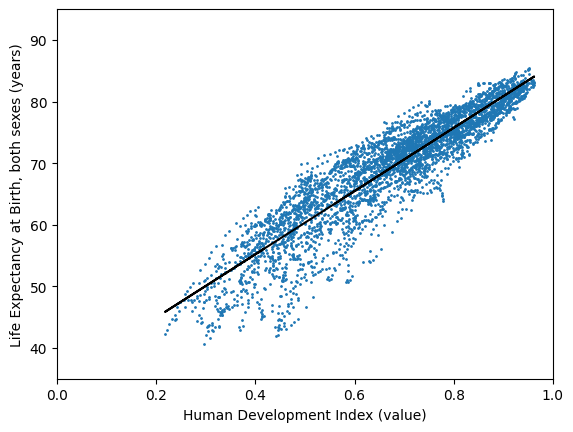

In [43]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

x_hdi_values_train = np.array(train_df["Human Development Index (value)"]).reshape(-1,1)
y_leb_values_train = np.array(train_df["Life Expectancy at Birth, both sexes (years)"])

# Create a linear regression model.
model = LinearRegression()
model.fit(x_hdi_values_train, y_leb_values_train)

r_score = model.score(x_hdi_values_train, y_leb_values_train)
model_intercept = model.intercept_
model_slope = model.coef_[0]

# Print model coefficients.
print(f"R-squared value: {r_score}")
print(f"Intercept: {model_intercept}")
print(f"Slope: {model_slope}")

# Plot the regression line on the diagram.
plt.scatter(x_hdi_values_train, y_leb_values_train, s=1)
plt.plot(x_hdi_values_train, model.predict(x_hdi_values_train), color="black")
plt.xlabel('Human Development Index (value)')
plt.ylabel('Life Expectancy at Birth, both sexes (years)')
plt.xlim(0,1)
plt.ylim(35,95)
plt.show()

# Problem 2.c
Finally, use the model to predict the LEB for the test set, and report the <br>
correlation between the predicted values and the target variable, and the Mean <br>
Squared Error (MSE) between the predictions and the true target variable values <br>
in your report. <br>

In [44]:
from sklearn.metrics import mean_squared_error
# calculate the mean squared error of the predicitons from the test set and the true values of the test set
x_hdi_values_test = np.array(train_df["Human Development Index (value)"]).reshape(-1,1)
y_leb_values_test = np.array(train_df["Life Expectancy at Birth, both sexes (years)"])

mse = mean_squared_error(y_leb_values_train, model.predict(x_hdi_values_train))
print(f"The mean squared error of the predicitons: {mse}")

The mean squared error of the predicitons: 13.426924533256466


## Problem 2.d
Look up information about the meaning of the variable, and describe why <br>
you think it has such a strong relationship with LEB. Remember to cite your <br>
sources. <br>

According to https://en.wikipedia.org/wiki/Human_Development_Index HDI is computed by three main  <br>
indicators one of which is LEB, so naturally a index using LEB correlates well with LEB. Without doing any <br>
further research you could also assume that the other indicators like average years of education and GNI <br>
also indicates life longeivity pretty well. <br>

## Problem 3
Recall sections 9.2.2 and 9.2.3 in Skiena. Now, explore your data and try to <br>
find a variable which has a non-linear monotonic relationship with the target <br>
variable. Hints: such variables could for instance be power-law distributed, <br>
resulting in a large difference in size between the min and max values they take <br>
on. You may also want to investigate the Pearson and Spearman correlations <br>
between candidate variables and the target. Finally, you may want to plot the <br>
candidate variable against the target to visualise the relationship, does it remind <br>
you of the shape of some non-linear function? <br>
Perform an appropriate transformation for the selected values, such that the <br>
transformed value have an approximately linear relationship with the target <br>
variable. In your report, report the variable that you found, the function that <br>
you used for transformation, and the Pearson correlation coefficient before and <br>
after transformation. <br>